In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("./dataset/train.csv")
test_data = pd.read_csv("./dataset/test.csv")

In [3]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [4]:
np.random.shuffle(train_data)

In [5]:
train_data = train_data.T

In [6]:
train_data.shape

(785, 42000)

In [7]:
X_train_data = train_data[1:,:]

In [8]:
X_train_data.shape

(784, 42000)

In [9]:
Y_train_data = train_data[0,:]

In [10]:
Y_train_data.shape

(42000,)

In [11]:
X_val_data = X_train_data[:,:1000]
X_train_data = X_train_data[:,1000:]

In [12]:
X_train_data = X_train_data / 255.
X_val_data = X_val_data / 255.

In [13]:
Y_val_data = Y_train_data[:1000]
Y_train_data = Y_train_data[1000:]

In [14]:
Y_val_data = Y_val_data.reshape(1,-1)
Y_train_data = Y_train_data.reshape(1,-1)

## Initialiation

In [15]:
def init_parameters():
    # W1: weights for hidden layer (128 neurons, 784 inputs)
    W1 = np.random.randn(128, 784) * np.sqrt(2.0 / 784) # He and Zhang initialization for ReLU layer
    b1 = np.zeros((128, 1))

    # W2: weights for output layer (10 classes)
    W2 = np.random.randn(10, 128) * np.sqrt(1.0 / 128) # Xavier initialization for Softmax layer
    b2 = np.zeros((10, 1))

    return W1, b1, W2, b2

## Forward propagation

In [16]:
def ReLU(Z):
    return np.maximum(0,Z)

In [17]:
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

In [18]:
def forward_propagation(W1,b1,W2,b2, X1):
    # Hidden layer
    Z1 = np.dot(W1,X1) + b1
    A1 = ReLU(Z1)
    # Output layer
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

## Backpropagation

In [19]:
def one_hot_vector(Y):
    one_hot_vector = np.zeros((Y.size, 10))
    one_hot_vector[np.arange(Y.size), Y] = 1
    one_hot_vector = one_hot_vector.T
    return one_hot_vector

In [20]:
def deriv_ReLU(Z):
    return Z > 0

In [21]:
def back_propagation(Z1,A1,W2,Z2,A2,X,Y) :
    m = Y.size
    # Convert labels to one-hot encoding
    one_hot_vector_Y = one_hot_vector(Y)
    # Output layer gradients
    dZ2 = A2 - one_hot_vector_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    # Hidden layer gradients
    dZ1 = (W2.T).dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    
    return db1, dW1, dZ1, db2, dW2, dZ2

## Weight update

In [22]:
def update_weights(W1, b1, dW1, db1, W2, b2, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1

    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

## Evaluation

In [23]:
def get_loss(A2, Y):
    one_hot_Y = one_hot_vector(Y)
    loss = -np.mean(np.sum(one_hot_Y * np.log(A2 + 1e-8), axis=0))
    return loss

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(Y, predictions):
    return np.sum(predictions == Y)/Y.size

 ## Training

In [24]:
def train(X,Y, epochs, alpha):
    W1, b1, W2, b2 = init_parameters()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(W1,b1,W2,b2, X)
        db1, dW1, dZ1, db2, dW2, dZ2 = back_propagation(Z1,A1,W2,Z2,A2,X,Y)
        W1, b1, W2, b2 = update_weights(W1, b1, dW1, db1, W2, b2, dW2, db2, alpha)
        
        if i % 10 == 0:
            predictions = get_predictions(A2)
            loss = get_loss(A2, Y)
            acc = get_accuracy(predictions, Y)
            print(f"Epoch = {i}, loss = {loss} and accuracy = {acc}")
    return W1, b1, W2, b2

In [26]:
W1, b1, W2, b2 = train(X_train_data, Y_train_data, 300, 0.02)

Epoch = 0, loss = 2.3170340417442015 and accuracy = 0.095
Epoch = 10, loss = 2.20203805111625 and accuracy = 0.1884390243902439
Epoch = 20, loss = 2.09136738667401 and accuracy = 0.3448780487804878
Epoch = 30, loss = 1.9725049426551429 and accuracy = 0.463609756097561
Epoch = 40, loss = 1.846397957885109 and accuracy = 0.5501219512195122
Epoch = 50, loss = 1.7194148583005153 and accuracy = 0.6098536585365854
Epoch = 60, loss = 1.5978680845111737 and accuracy = 0.6520975609756098
Epoch = 70, loss = 1.4856112974329332 and accuracy = 0.683609756097561
Epoch = 80, loss = 1.3840644958312571 and accuracy = 0.7090487804878048
Epoch = 90, loss = 1.293121184274752 and accuracy = 0.7293658536585366
Epoch = 100, loss = 1.2122947754924611 and accuracy = 0.7461951219512195
Epoch = 110, loss = 1.1406863574110269 and accuracy = 0.7600487804878049
Epoch = 120, loss = 1.0774233057881888 and accuracy = 0.7713414634146342
Epoch = 130, loss = 1.0215542069833605 and accuracy = 0.7817073170731708
Epoch = 14

## Validation accuracy

In [27]:
Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X_val_data)
preds = get_predictions(A2)
val_accuracy = get_accuracy(Y_val_data, preds)
print("Validation accuracy =", val_accuracy)

Validation accuracy = 0.863


## Predictions

In [28]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1,b1,W2,b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train_data[:, index, None]
    prediction = make_predictions(X_train_data[:, index, None], W1, b1, W2, b2)
    label = Y_train_data[0][index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  2


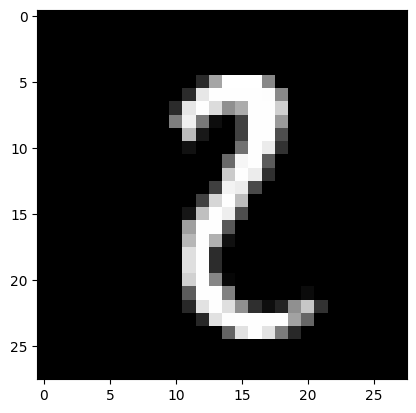

Prediction:  [0]
Label:  0


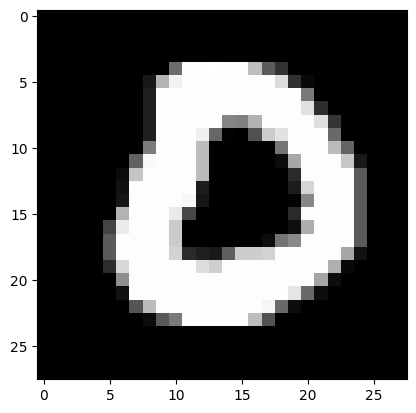

Prediction:  [2]
Label:  2


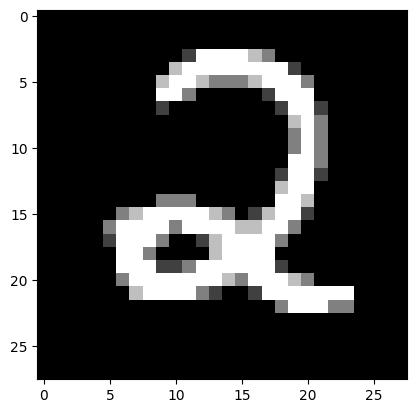

Prediction:  [1]
Label:  1


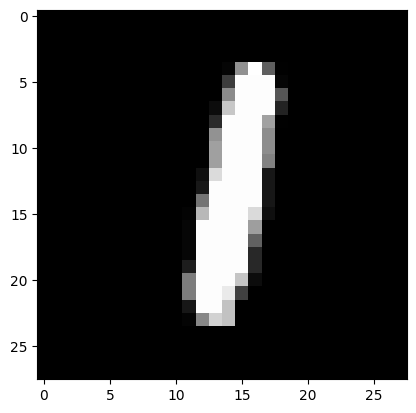

Prediction:  [0]
Label:  0


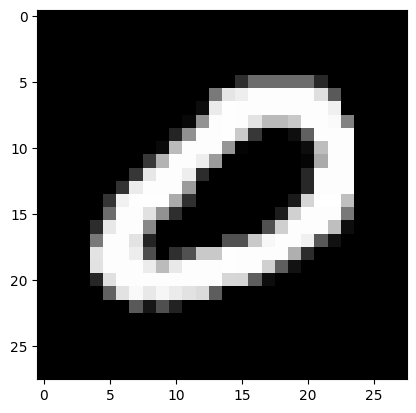

In [29]:
for i in range(5,10):
    test_prediction(i, W1, b1, W2, b2)